# PROGRAMMING FOR DATA ANALYSIS PROJECT



### OBJECTIVES

1 Source a dataset which has at least 100 data points across 4 variables.
2 Investigate the variables, their likely distributions and their relationships
    with each other.
3 Simulate a data set as closely matching the properties of the real world
    data set as possible.


#### Sources

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 
http://www3.dsi.uminho.pt/pcortez/student.pdf
 These two sources were very useful.  I found my dataset in the first source and used the second to find out how the Cortez & Silva
study related to predicting success in education by examining variables in the students' lives.

http://uis.unesco.org/country/PT
    Provides data of population of Portugal broken down by age.
    
https://www.oecd-ilibrary.org/docserver/9789264117020-4-en.pdf
    Provided me with information about Portugese school system.
   
https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
    This source helped me to tidy up the dataset into the columns and rows I wanted to keep.

https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/
    This source helped me to find a way to display all the data in the dataset.
    
https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/
    This source was very useful with appropriate functions to interpret the data.

https://seaborn.pydata.org/
    This source helped me to use correct syntax to plot my data.  It was also excellent to help me choose which plots to use.
    
https://www.bing.com/videos/search?q=normal+distribution+python
    A useful video to help me code a normal distribution plot.
    
https://stackoverflow.com/questions/16312006/python-numpy-random-normal-only-positive-values
    All my values are positive so a normal distribution will not show my data.  This site 
    suggested I try a binomial distribution.  A binomial distribution is a discrete distribution
    which only represents yes/no or true/false options so this will not do.
    
https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/
https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
    These sites helped me with data snippets I could manipulate to create plots to display 
    my dataset.
    
https://stackoverflow.com/questions/10138085/python-plot-normal-distribution 
http://www.johndcook.com/distributions_scipy.html 
http://docs.scipy.org/doc/scipy/reference/stats.html 
http://telliott99.blogspot.com/2010/02/plotting-normal-distribution-with.html
The stackoverflow site offered some code to help me create a way to plot a normal distribution using my data mean and standard deviation. 
The other three urls are the sources of the code which I modified to plot my data. I had to abandon this method of illustration as it gave me negative values.

https://www.youtube.com/watch?v=zQy0lEfXsVI 
Noureddin Sadawi runs this Youtube site on Pandas Dataframes, it helped me to construct my histograms.

https://seaborn.pydata.org/tutorial/relational.html 
I used this site to plan my other plots to correlate data.
        





### FINDING A DATASET - Objective 1

Silva and Cortez studied students in two subjects, Portugese and Maths.  I selected the csv for Maths because I thought 
it would be more relatable for me to choose a universal school subject.
I predict there is a link between the variables; school attendance, mother's education, father's education, plans to attend 
higher education and achievement.  I will use the dataset produced by Cortez and Silva which includes these variables among others.
First I will import the dataset and eliminate the other variables until I have the ones I want to investigate.  

In [1]:
# Import library and dataset.
import pandas as pd

# The dataset was in a zipped file so I had to unzip it, save it to my local machine and then read the filename into
# Jupyter.  The file was not saved using commas as delimiters so I added the parameter delimiter = ; so Pandas could
# organise the information into a separated file of rows and columns.  The folder is saved as student with the other files
# relating to this project.  This folder has four files from which I have chosen the file to do with achievement in maths.

dfgrade = pd.read_csv("student/student-mat.csv", delimiter=";")

# Check the types of data; object, int etc.
dfgrade.dtypes

# Show the full dataframe, I have commented this as it is very big.
#print(dfgrade)


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [2]:
import pandas as pd
dfgrade = pd.read_csv("student/student-mat.csv", delimiter=";")


# Use the drop function to take all the columns out which I will not be using.
dfgrade = dfgrade.drop(["school", "sex", "age", "address","famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "traveltime", 
             "studytime", "failures", "schoolsup", "famsup", "paid", "activities", "nursery", "internet", 
              "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health"], axis=1)
#print(dfgrade)

# Having looked at all the data there is a large number of students who got
# 0 as their final grade (G3).  I am going to take this group out of the cohort
# because they are skewing the statistics.  I assume for one reason or another they
# did not take the final exam.  I found this out further down and came back to this cell.

dfgrade = dfgrade.drop([128, 130, 131, 134, 135, 136, 136, 137, 140, 144, 146, 148,
           150, 153, 160, 162, 168, 170, 173, 221, 239, 242, 244,
       259, 264, 269, 296, 310, 316, 332, 333, 334, 337, 341, 367, 387, 389])

# Show the new dataframe, it now has 359 rows and 7 columns, excluding the index column.
print(dfgrade)


     Medu  Fedu higher  absences  G1  G2  G3
0       4     4    yes         6   5   6   6
1       1     1    yes         4   5   5   6
2       1     1    yes        10   7   8  10
3       4     2    yes         2  15  14  15
4       3     3    yes         4   6  10  10
..    ...   ...    ...       ...  ..  ..  ..
390     2     2    yes        11   9   9   9
391     3     1    yes         3  14  16  16
392     1     1    yes         3  10   8   7
393     3     2    yes         0  11  12  10
394     1     1    yes         5   8   9   9

[359 rows x 7 columns]





### INVESTIGATION OF DATA SET - Objective 2

In [3]:
# Information about the dataframe, the variables and their datatype.
dfgrade.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 394
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Medu      359 non-null    int64 
 1   Fedu      359 non-null    int64 
 2   higher    359 non-null    object
 3   absences  359 non-null    int64 
 4   G1        359 non-null    int64 
 5   G2        359 non-null    int64 
 6   G3        359 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 22.4+ KB


In [4]:
# Statistical information about the variables showing the mean, standard deviation,
# quartile values, maximum and minimum values.
dfgrade.describe()


,Medu,Fedu,absences,G1,G2,G3
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.00000
mean,2.788301,2.540390,6.281337,11.247911,11.331476,11.45961
std,1.095841,1.084637,8.178283,3.245511,3.161197,3.33140
min,0.000000,0.000000,0.000000,3.000000,5.000000,0.00000
25%,2.000000,2.000000,2.000000,9.000000,9.000000,9.00000
50%,3.000000,3.000000,4.000000,11.000000,11.000000,11.00000
75%,4.000000,3.000000,8.000000,14.000000,13.500000,14.00000
max,4.000000,4.000000,75.000000,19.000000,19.000000,20.00000


In [5]:
# To examine one data point use the iloc method to locate the piece of data
# in the first position on the first row.
dfgrade.iloc[0:1,0:1]


,Medu
0,4


In [6]:
# To examine the data of one student at index 353
# This student has 2 parents who left school on or before age 9, he/she hopes
# to go to higher education, he/she has had 4 absences in the year and he/she
# has scored 8 out of 20 in the three tests that year, a failing grade.

dfgrade.set_index("Medu")
dfgrade.loc[(353)]


Medu          1
Fedu          1
higher      yes
absences      4
G1            8
G2            8
G3            8
Name: 353, dtype: object

In [7]:
# Identify the name of each column.

print(dfgrade.columns)


Index(['Medu', 'Fedu', 'higher', 'absences', 'G1', 'G2', 'G3'], dtype='object')




#### COMPARING G3 TO MOTHERS' EDUCATION

In [8]:
# Use pandas to cross tabulate the final year grade G3 with mother's education. This data shows us that
# only 3 students over the pass grade of 8 had mothers who had no education.  At the other end of the scale students
# who scored poorly (below 8) 18 of their mothers had a third level education.  The remaining students (107) of mothers 
# who had 3rd level education scored above 8.  The highest number of students still in school at secondary level are from
# families where their mothers have achieved a 3rd level education(125).

pd.crosstab(dfgrade["Medu"], dfgrade["G3"], margins = True)


G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
Medu,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,3
1,1,0,2,2,2,6,4,13,7,6,4,1,1,2,0,0,0,0,51
2,1,0,0,4,1,11,6,14,15,10,10,8,5,1,2,1,1,0,90
3,0,0,3,5,3,7,8,15,11,8,7,3,9,3,2,5,1,0,90
4,0,1,2,4,3,8,9,14,14,7,10,15,16,10,2,6,3,1,125
All,2,1,7,15,9,32,28,56,47,31,31,27,33,16,6,12,5,1,359


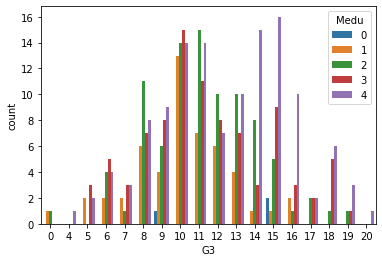

In [9]:
# Use seaborn to plot the data above to examine the relationship between mother's grade
# and child performance in school. A count plot can is a histogram across 
# a categorical, instead of quantitative, variable. 

import seaborn as sns

sns.countplot(x = "G3", hue="Medu", data = dfgrade);

# The plot clearly shows a high correlation between mother's education and the child's
# G3 school grade.  The purple bar represents mothers with 3rd level education and this
# bar is most highly correlated with children in the 14 - 20 grade scores.


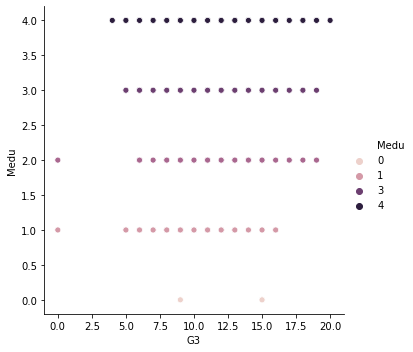

In [10]:
# Seaborn's relplot probably gives a clearer visualisation of the relationship between
# the student's final grade (G3) and his/her mother's education.  The different shades of purple
# relate to mother's education, and we can see more students with higher grades have mothers with higher education.
sns.relplot(x="G3", y = "Medu", hue = "Medu", data=dfgrade);

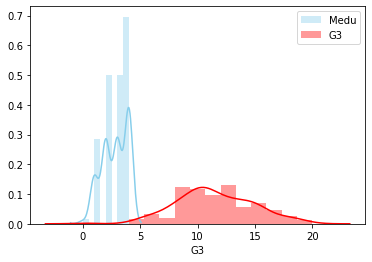

In [11]:
# Plotting two variables, mothers' education and G3 on the same Axis
import matplotlib.pyplot as plt
sns.distplot( dfgrade["Medu"] , color="skyblue", label="Medu")
sns.distplot( dfgrade["G3"] , color="red", label="G3")
plt.legend()
 
plt.show()

# This plot shows the correlation between mother's education and student grade.



#### COMPARING G3 TO FATHERS' EDUCATION

In [12]:
# Use pandas to cross tabulate the final year grade G3 with father's education. This data shows us that
# only 2 students over the pass grade of 8 had fathers who had no education.  At the other end of the scale students
# who scored poorly (below 8) 11 of their fathers had a third level education.  The remaining students (77) of fathers 
# in the 3rd level category scored above 8.  The highest number of students still in school at this stage are from
# families where their fathers have achieved a primary education. 

# It seems therefore that mother's education correlates more positively with children's achievement.

pd.crosstab(dfgrade["Fedu"], dfgrade["G3"], margins = True)


G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
Fedu,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2
1,1,0,1,5,5,8,5,16,6,8,5,4,3,3,0,2,0,0,72
2,1,0,3,4,1,8,9,14,17,8,9,8,12,4,0,2,3,0,103
3,0,1,1,3,1,12,9,18,11,7,8,4,8,4,2,4,0,1,94
4,0,0,2,3,2,4,5,7,13,8,9,11,10,4,4,4,2,0,88
All,2,1,7,15,9,32,28,56,47,31,31,27,33,16,6,12,5,1,359


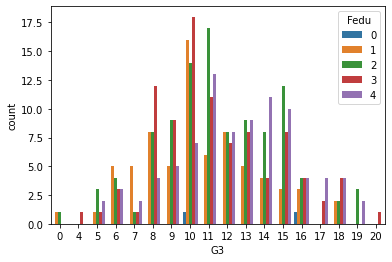

In [13]:
# Use seaborn to plot the data above to examine the relationship between father's grade
# and child performance in school.

sns.countplot(x = "G3", hue="Fedu", data = dfgrade);

# The plot shows a medium correlation between father's education and the child's
# G3 school grade.  The purple bar represents fathers with 3rd level education and this
# bar is correlated with children in the 14 - 20 grade score.


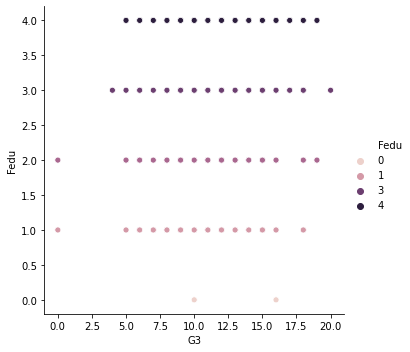

In [14]:
# Seaborn's relplot probably gives a clearer visualisation of the relationship between
# the student's final grade (G3) and his/her father's education.  The different shades of purple
# relate to father's education, and we can see students with higher grades have fathers with higher education.
# There are not as many having this correlation as the previous group.

sns.relplot(x="G3", y = "Fedu", hue = "Fedu", data=dfgrade);

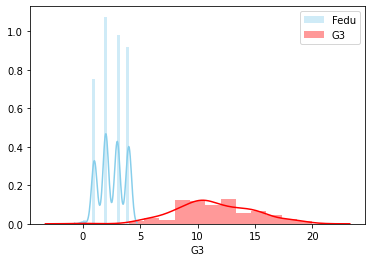

In [15]:
# Plotting fathers' education and G3 on the same Axis
sns.distplot( dfgrade["Fedu"] , color="skyblue", label="Fedu")
sns.distplot( dfgrade["G3"] , color="red", label="G3")
plt.legend()
 
plt.show()

# This plot shows the correlation between father's education and grade score.



#### COMPARING G3 AND ABSENCES

In [16]:
# Show the cross tabulation of the G3 score with the number of days
# the student was absent from school.

pd.crosstab(dfgrade["absences"], dfgrade["G3"], margins = True)


G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
absences,,,,,,,,,,,,,,,,,,,
0,2,0,0,1,1,6,4,12,6,10,4,6,15,4,3,3,2,0,79
1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,3
2,0,0,1,1,1,6,3,10,12,5,6,5,6,5,1,3,0,0,65
3,0,0,0,0,1,1,0,0,3,1,0,0,0,2,0,0,0,0,8
4,0,0,0,5,0,2,5,13,8,3,3,6,4,2,0,1,0,1,53
5,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,5
6,0,0,0,2,2,1,1,6,3,2,5,5,1,0,0,2,1,0,31
7,0,0,0,1,0,1,1,0,0,0,0,2,1,0,1,0,0,0,7
8,0,0,1,1,0,2,2,7,2,2,2,2,0,0,0,1,0,0,22


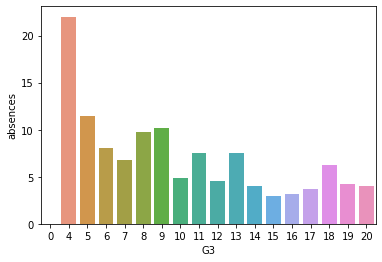

In [17]:
# Using seaborn barplot to demonstrate the correlation between the 
# number of absent days and the G3 grade the students scored.  The barchart
# shows clearly that students who missed 20+ days of school were
# mainly represented in the lower scores and students with 5 or fewer
# absence days are highly represented in the 14+ grade point scores. 

sns.barplot(x = "G3", y="absences", ci = None, data = dfgrade);


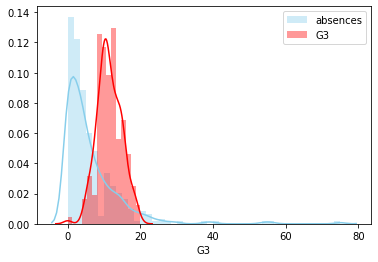

In [18]:
# Plotting absences and G3 on the same Axis
sns.distplot( dfgrade["absences"] , color="skyblue", label="absences")
sns.distplot( dfgrade["G3"] , color="red", label="G3")
plt.legend()
 
plt.show()

# This plot shows the high correlation between fewer absences and higher grade score.



#### COMPARING G3 TO 3RD LEVEL INTENTIONS

In [19]:
# Crosstabulating final grade, G3, with intention to go to 3rd Level.

# This data cannot be said to be useful in predicting grades
# for students in maths.  Because this is a secondary school most
# students attending would intend to attend third level.  It seems
# that in the Portugese educational system it is normal to leave
# at 15 if you are not planning 3rd level.  Therefore it is safe to
# assume that those who go to secondary want to go to third level even
# if their grades do not make that a likely outcome.  I have discontinued
# using this variable for any further analysis.


pd.crosstab(dfgrade["higher"], ["G3"], margins = True)


col_0,G3,All
higher,,
no,14,14
yes,345,345
All,359,359




#### PLOTTING VARIABLES TOGETHER

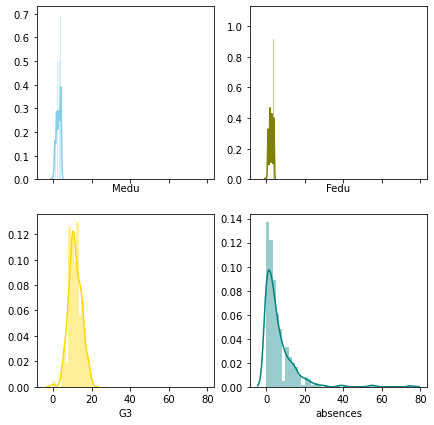

In [20]:
# plot the four variables together.
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( dfgrade["Medu"] , color="skyblue", ax=axes[0, 0])
sns.distplot( dfgrade["Fedu"] , color="olive", ax=axes[0, 1])
sns.distplot( dfgrade["G3"] , color="gold", ax=axes[1, 0])
sns.distplot( dfgrade["absences"] , color="teal", ax=axes[1, 1])

# These plots display that the mothers in the sample have the wider differences in education levels, the father's education
# levels are concentrated more.  The third plot shows that the grades attained by the sample average around 10/11.  The fourth
# plot shows that the majority of students were absent for 4 days or less.


### PLOTTING THE FOUR VARIABLES SEPARATELY

Text(0, 0.5, 'Number of Mothers/Frequency')

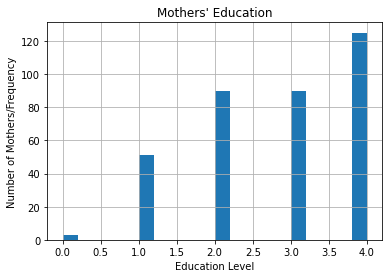

In [21]:
# Creating a histogram to illustrate mothers' educational attainment.

from pandas import DataFrame

Medu = dfgrade.iloc[:,[0]]
Medu.hist(bins = 20)
plt.title("Mothers' Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Mothers/Frequency")




Text(0, 0.5, 'Number of Fathers/Frequency')

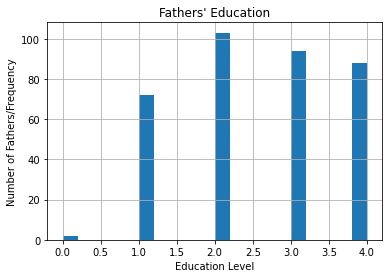

In [22]:
# Creating a histogram to illustrate fathers' educational attainment.
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



Fedu = dfgrade.iloc[:,[1]]
                    
Fedu.hist(bins = 20)
                    
plt.title("Fathers' Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Fathers/Frequency")







Text(0, 0.5, 'Number of Absences/Frequency')

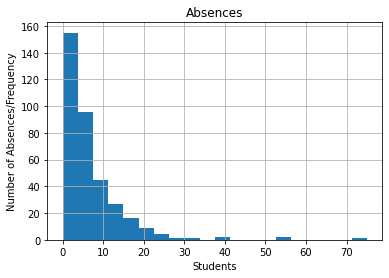

In [23]:
# Creating a histogram to illustrate absenteeism in the simulated student group.
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
absences = dfgrade.iloc[:,[3]]
#print(absences)
absences.hist(bins = 20)
plt.title("Absences")
plt.xlabel("Students")
plt.ylabel("Number of Absences/Frequency")



Text(0, 0.5, 'Number of Students/Frequency')

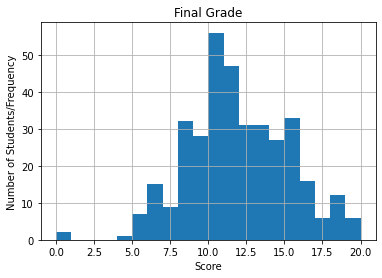

In [24]:
# Creating a histogram to illustrate final year grades (G3).
from pandas import DataFrame

G3 = dfgrade.iloc[:,[6]]
G3.hist(bins = 20)
plt.title("Final Grade")
plt.xlabel("Score")
plt.ylabel("Number of Students/Frequency")



<<br>>

### CREATE DATASETS WHICH SIMULATE THE FOUR VARIABLES (MEDU, FEDU, ABSENCES AND G3)- Objective 3

EXTRA SOURCES

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
Useful to check correct syntax.

https://datatofish.com/list-to-dataframe/
I realised I had to change lists to dataframes so I could compare/contrast.

https://stackoverflow.com/users/959876/moldovean
A very handy guide to loc and iloc to isolate a column.

https://scipy-lectures.org/packages/scikit-learn/index.html
    

In [25]:
# Creating a dataset to simulate Medu

# source of function 
# https://github.com/runawayhorse001/statspy/blob/master/statspy/basics.py

import numpy as np
import pandas as pd
from scipy.stats import norm

def rnorm(n, mean=0, sd=1):
    """
    Random generation for the normal distribution with mean 
    equal to mean and standard deviation equation to sd
    same functions as rnorm in r: ``rnorm(n, mean=0, sd=1)``
    :param n: the number of the observations
    :param mean: vector of means
    :param sd: vector of standard deviations
    :return: the vector of the random numbers  
    :author: Wenqiang Feng
    :email:  von198@gmail.com
    """
    return norm.rvs(loc=mean, scale=sd, size=n)

#2.788301 	2.540390 	6.281337 	11.247911 	11.331476 	11.45961
#1.095841 	1.084637 	8.178283 	3.245511 	3.161197 	3.33140
#Medu = dfgrade.iloc[:,[0]]
#G3 = dfgrade.iloc[:,[6]]
#pca = PCA(n_components = 2, whiten = True)
#pca.fit(Medu)

mu = 2.788301
SD = 1.095841
N = 359
simulated_data = rnorm(359, 2.788301, 1.095841)
print(simulated_data)



[ 1.98470063  1.6543502   0.74655585  3.15386849  1.78831827  2.36797037
  2.26014798  3.06789585  2.4375383   4.18535263  2.14119397  1.48430829
  2.78063413  3.77276372  2.61517503  1.68939015  2.53317511  2.29335632
  1.70262932  0.81105782  4.35149162  2.12057695  1.18551394  1.94085613
  3.01565688  3.70085737  4.86063348  1.21842702  4.36414112  3.14647853
  4.22575547  3.71355375  3.47821882  2.19257405  3.6936412   3.16621674
  1.27440048  3.36912725  0.80878966  2.91661371  3.66747518  2.21129992
  4.87613422  2.04390836  3.85148496  3.26946641  2.32401582  2.2194766
  1.27486345  3.22338464  1.2360112   4.25014718  4.186911    2.54458493
  3.35532357  4.50197301  4.11459997  1.90028314  1.89554832  2.28952281
  2.04118197  2.67349032  3.94768443  2.37829631  2.96047261  0.60438125
  3.71959877  4.38713569  1.79590515  2.5848379   2.36827244  2.7229632
  1.86381981  3.45694903  3.4102059   3.44876092  4.49585377  3.00561345
  3.87396159  3.02152985  3.65157914  4.18832762  2.8

In [26]:
import numpy as np
a = simulated_data
# np.histogram(a, bins = [0,1,2,3,4])
hist, bins = np.histogram(a, bins =[0,1,2,3,4])
print(hist)
print(bins)

[ 12  70 123 109]
[0 1 2 3 4]


Text(0, 0.5, 'Number of Mothers/Frequency')

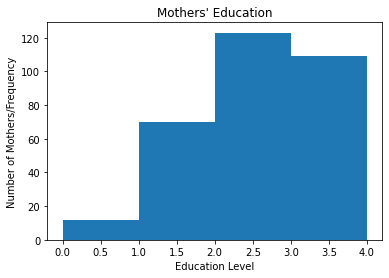

In [27]:
# A histogram to illustrate mothers' education simulated levels. import numpy as np
import matplotlib.pyplot as plt
import numpy as np


a = simulated_data
plt.hist(a, bins = [0, 1, 2, 3, 4])
plt.title("Mothers' Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Mothers/Frequency")


In [28]:
# Creating a dataset to simulate Fedu

mu =2.540390 
SD =1.084637
N = 359

simulated_data1 = rnorm(359,2.540390 , 1.084637)
print(simulated_data1)


[ 2.72976061  3.21756238  5.77957867  2.09962782  1.92535793  3.3087232
  3.45903288  2.27117936  4.37822001  2.07467302  1.99208198  1.73942936
  3.07324894  1.02956436  3.62985426  2.22496756  2.81830978  0.46838513
  2.80805264  1.85073588  0.88964674  1.8909769   2.976258    4.07382899
  3.84000645  4.29907442  2.28338476  0.71653594  3.65079675  0.92326947
  2.74690147  0.87279102  2.07294327  2.33140092  1.90591299  1.76540802
  3.97966924  3.69266519  4.0408474   1.70740838  3.29413108  2.40089069
  1.08384899  3.86762176  2.73202933  2.23866317  2.59791009  4.45274678
  1.98373641  4.39863737  2.67932572  0.81207057  3.38048874  4.3094141
  2.2909189   3.98004917  3.78512226  3.5843425   3.54371802  3.5235152
  2.36954952  4.81653957  3.01286761  1.6719323   2.30741745  0.92979771
  3.00407631  4.5571842   4.67977472  2.10973122  2.84657798  1.71854361
  1.75691548  2.69263835  1.30148763  4.26800539  1.75688673  2.11355841
  3.16381164  2.73007001  1.05401326  4.35155992  1.02

In [29]:
import numpy as np
b = simulated_data1
hist, bins = np.histogram(b, bins =[0,1,2,3,4])
print(hist)
print(bins)

[ 25  81 119  99]
[0 1 2 3 4]


Text(0, 0.5, 'Number of Fathers/Frequency')

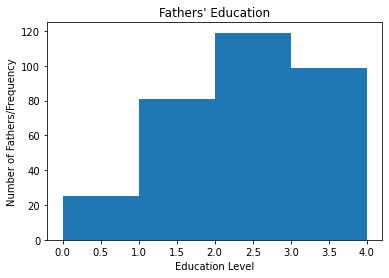

In [30]:
# A histogram to illustrate fathers' education simulated levels. 

b = simulated_data1
plt.hist(b, bins = [0, 1, 2, 3, 4])
plt.title("Fathers' Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Fathers/Frequency")




In [31]:
# Creating a dataset to simulate Absences
mu=6.281337
SD=8.178283
N=359

simulated_data2 = rnorm(359, 6.281337,8.178283)
print(simulated_data2)




[  8.93161276   3.56603567   7.79918396  -1.8411085   13.65626515
   4.8875668    9.86951213   4.22480534   2.27521382   3.6731926
  15.06293965   8.41208079   8.16012501   8.95183266  -8.25330064
  -0.12559838  -9.16322212  18.53067825  15.44990617  11.30842768
   0.91706276   8.0504065   -1.50425582   3.94756961  14.81084008
  10.65509686  18.79827051  10.59869443  13.72395372   5.03414006
  11.41984819  11.13088313  27.26737401  -0.81984217  21.93900345
  14.19803126  -8.63396906  12.76463499   8.13571866  18.53049648
  -1.70496588  16.5858589    7.93458124   1.46559619   6.69317155
  -0.81681137   5.63867517  -5.58847263   2.93311005  -2.43729923
  16.3736237   19.15076718  14.97718426   0.1434163   -3.04681254
   9.31250514   7.3954828    4.76231298  -6.30569378  11.09873715
   1.1478639    0.17572799   0.29188354   5.03196627  19.33984342
   8.35315694  13.32612164   4.36243721  20.13179357   7.89820077
   3.23647463   2.24767583  12.81674494  11.3426247    3.73022566
  14.635450

In [32]:
import numpy as np
c = simulated_data2
hist, bins = np.histogram(c, bins = 20)
print(hist)
print(bins)

[ 3  3 13 10 14 23 27 34 42 38 34 35 24 24 14  8  4  6  2  1]
[-14.1689022  -11.94526635  -9.72163051  -7.49799466  -5.27435881
  -3.05072297  -0.82708712   1.39654873   3.62018457   5.84382042
   8.06745627  10.29109211  12.51472796  14.73836381  16.96199965
  19.1856355   21.40927134  23.63290719  25.85654304  28.08017888
  30.30381473]


Text(0, 0.5, 'Number of Absent Days/Frequency')

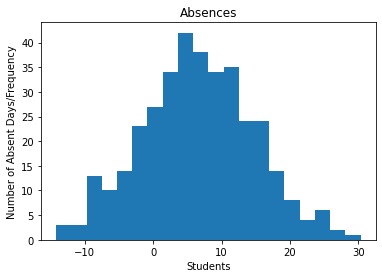

In [37]:
# Creating a histogram to illustrate absenteeism in the simulated student group.

c = simulated_data2
plt.hist(c, bins = 20)
plt.title("Absences")
plt.xlabel("Students")
plt.ylabel("Number of Absent Days/Frequency")







In [34]:
# Creating a dataset to simulate G3

mu = 11.45961
SD = 3.33140
N = 359

simulated_data3 = rnorm(359, 11.45961, 3.33140)
print(simulated_data3)



[ 5.07706851  7.8281992   7.90058861 11.81823267 10.99740629 11.28807305
  8.35444305 12.7004897  12.75452537 10.68238508 15.12429487 10.96812746
  6.75191579  7.69709016 12.47892342  5.43876676  9.645986    9.73243474
 11.87630235 10.61656769  8.77899675  9.04387559 11.80873508 13.41187897
  9.54157007 10.26321624 13.50874058 11.11684573  7.11285943  6.87928239
  6.50209778 11.52686416  8.14761235  5.62814072 11.23521577 17.0608903
 13.68882061  8.0270024  13.22416558 14.55270022  5.63851209  7.97270275
 10.87740842 10.50573695 13.74185271  9.91825143 12.60294509 19.82535742
 12.18034821 17.49507181  8.62704413 12.37426993  8.80552581 13.32310995
 12.47596851 10.73041682  9.39853118  8.4267998  11.20300336  5.78310528
  8.64902811  8.9892269  15.47980168 10.42672705  7.20125982 10.18938546
 15.13652192  8.9384645  10.70372997  5.76029899 14.05297956  8.72425732
 12.13353265  8.25083812  9.86121148 17.87140945 13.62125797 17.30241491
 13.62381719 14.75869806  9.88096451  7.29740139 10.

In [35]:
import numpy as np
d = simulated_data

hist, bins = np.histogram(d, bins = 20)
print(hist)
print(bins)

[ 1  0  1  1  3  7 13 18 33 25 44 49 40 40 26 20 25  6  4  3]
[-0.94258311 -0.62346799 -0.30435286  0.01476226  0.33387739  0.65299251
  0.97210764  1.29122276  1.61033789  1.92945301  2.24856814  2.56768326
  2.88679839  3.20591351  3.52502864  3.84414376  4.16325889  4.48237401
  4.80148914  5.12060426  5.43971939]


Text(0, 0.5, 'Number of Students/Frequency')

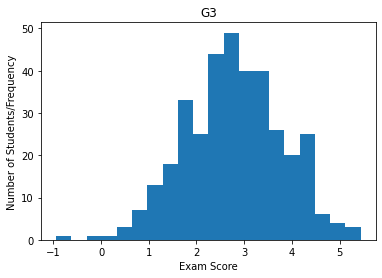

In [38]:
# Creating a histogram to illustrate G3, the final year score in the simulated student group.

import matplotlib.pyplot as plt
import numpy as np


d = simulated_data
plt.hist(d, bins = 20)
plt.title("G3")
plt.xlabel("Exam Score")
plt.ylabel("Number of Students/Frequency")


